# 0. Loading Packages

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import dates
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter


# 1. Loading Data

In [5]:
df = pd.read_csv("data.csv", delimiter = ";", decimal = ",")
df

,Start,End,Registration,Amount,Amount Refunded,Days,Hours,Kilometers
0,2022-09-30 08:45,2022-09-30 12:00,ESP27B,320.26,0.0,0,3,22
1,2022-04-06 08:30,2022-04-06 16:00,ESP27B,617.50,0.0,0,7,40
2,2022-03-27 13:00,2022-03-27 17:15,FCE68C,559.51,0.0,0,4,106
3,2022-03-20 17:30,2022-03-20 22:00,MGD320,305.00,0.0,0,4,20
4,2022-03-20 09:00,2022-03-20 12:30,YTH92B,379.91,0.0,0,3,49
...,...,...,...,...,...,...,...,...
181,2022-05-15 11:30,2022-05-15 13:30,GOH58A,208.69,0.0,0,2,39
182,2022-04-29 11:00,2022-04-29 16:15,KKJ20F,500.69,0.0,0,5,83
183,2022-04-24 11:00,2022-04-24 13:00,PGP00J,251.00,0.0,0,2,43
184,2022-04-22 10:00,2022-04-22 17:00,UPG59G,623.50,0.0,0,7,44


# 2. General Statistics

## Data Types

In [18]:
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
Start,datetime64[ns]
End,datetime64[ns]
Registration,object
Amount,float64
Amount Refunded,float64
Days,int64
Hours,int64
Kilometers,int64
startYear,int64
startMonth,int64


## Statistical Description

In [20]:
df.describe()

,Amount,Amount Refunded,Days,Hours,Kilometers,startYear,startMonth,endMYear,endMonth,HoursTotal
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000
mean,667.313656,3.696237,0.349462,4.413978,83.725806,2021.134409,7.134409,2021.139785,7.075269,12.801075
std,1408.108505,39.085152,1.696236,3.589115,170.449248,0.830629,3.055911,0.839452,3.067657,41.843443
min,68.000000,0.000000,0.000000,0.000000,0.000000,2020.000000,1.000000,2020.000000,1.000000,1.000000
25%,241.430000,0.000000,0.000000,2.000000,28.250000,2020.000000,5.000000,2020.000000,5.000000,2.000000
50%,391.000000,0.000000,0.000000,3.000000,51.500000,2021.000000,7.000000,2021.000000,7.000000,4.000000
75%,580.945000,0.000000,0.000000,6.000000,71.000000,2022.000000,10.000000,2022.000000,9.750000,6.000000
max,13895.000000,500.000000,15.000000,21.000000,1385.000000,2023.000000,12.000000,2023.000000,12.000000,360.000000


## Missing Values

In [21]:
def get_missing_values_percent(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    dropped_columns = missing_data[missing_data.Percent >= 0.5].index
    print(missing_data)

In [22]:
get_missing_values_percent(df)

                 Total  Percent
Start                0      0.0
End                  0      0.0
Registration         0      0.0
Amount               0      0.0
Amount Refunded      0      0.0
Days                 0      0.0
Hours                0      0.0
Kilometers           0      0.0
startYear            0      0.0
startMonth           0      0.0
endMYear             0      0.0
endMonth             0      0.0
HoursTotal           0      0.0


# 3. Data Visualization

## Distribution

In [37]:
def plot_distribution(dataframe, column, ax, bins_ = 20):
    dataframe[column].plot(kind = "hist", bins = bins_, ax = ax, color = "lightblue", ec = "black", linewidth = 1)
    
    min_ylim, max_ylim = ax.get_ylim()
    mean = dataframe[column].mean()
    std = dataframe[column].std()
    
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()
    ax.set_xlabel(column)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax.ticklabel_format(style = "plain", axis = "x")
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    ax.axvline(mean, color = "k", linestyle = "--", linewidth = 1)
    ax.set_title("Histogram of {}: $\mu$ = {:.2f}, $\sigma$ = {:.2f}".format(column, mean, std))

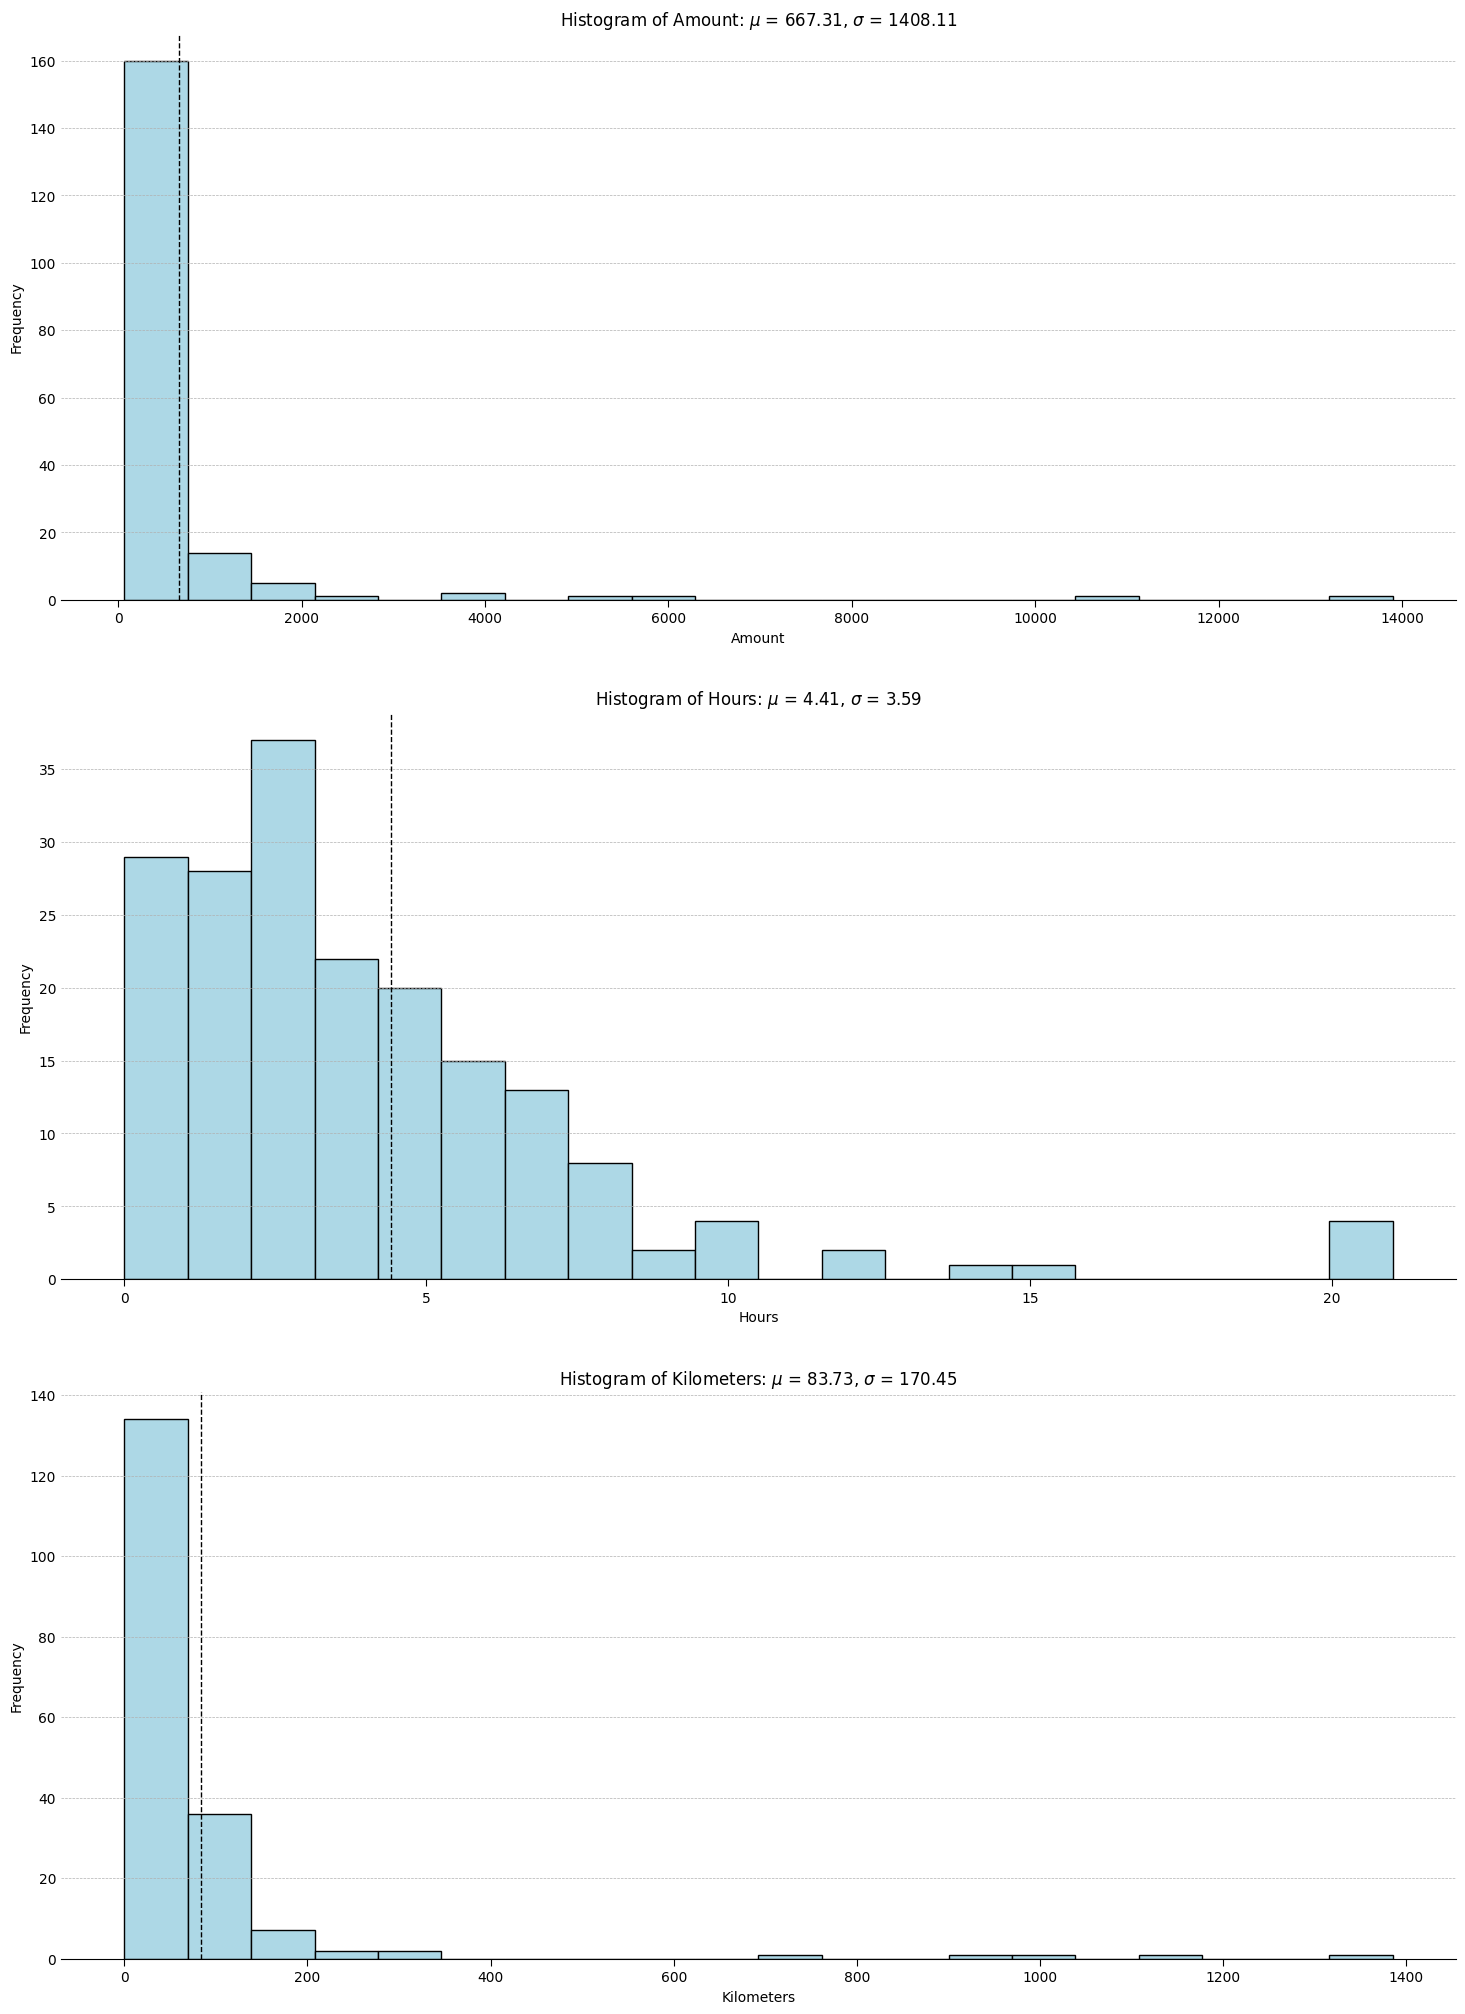

In [38]:
fig, axs = plt.subplots(nrows = 3, figsize = (18,25))

plot_distribution(df, "Amount", axs[0])
plot_distribution(df, "Hours", axs[1])
plot_distribution(df, "Kilometers", axs[2])

## Variables over Time

In [69]:
def plot_dates(df):
    ax = df.plot(kind = "bar", figsize = (25, 10))

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["bottom"].set_visible(True)
    ax.get_xaxis().tick_bottom()    
    ax.get_yaxis().tick_left()  
    ax.grid(axis = "y", linestyle = "--", linewidth = 0.5)
    
    ax.tick_params(
        axis="y",  
        length = 0
    ) 
    ax.tick_params(
        axis="x",  
        length = 5
    ) 
    
    plt.show()

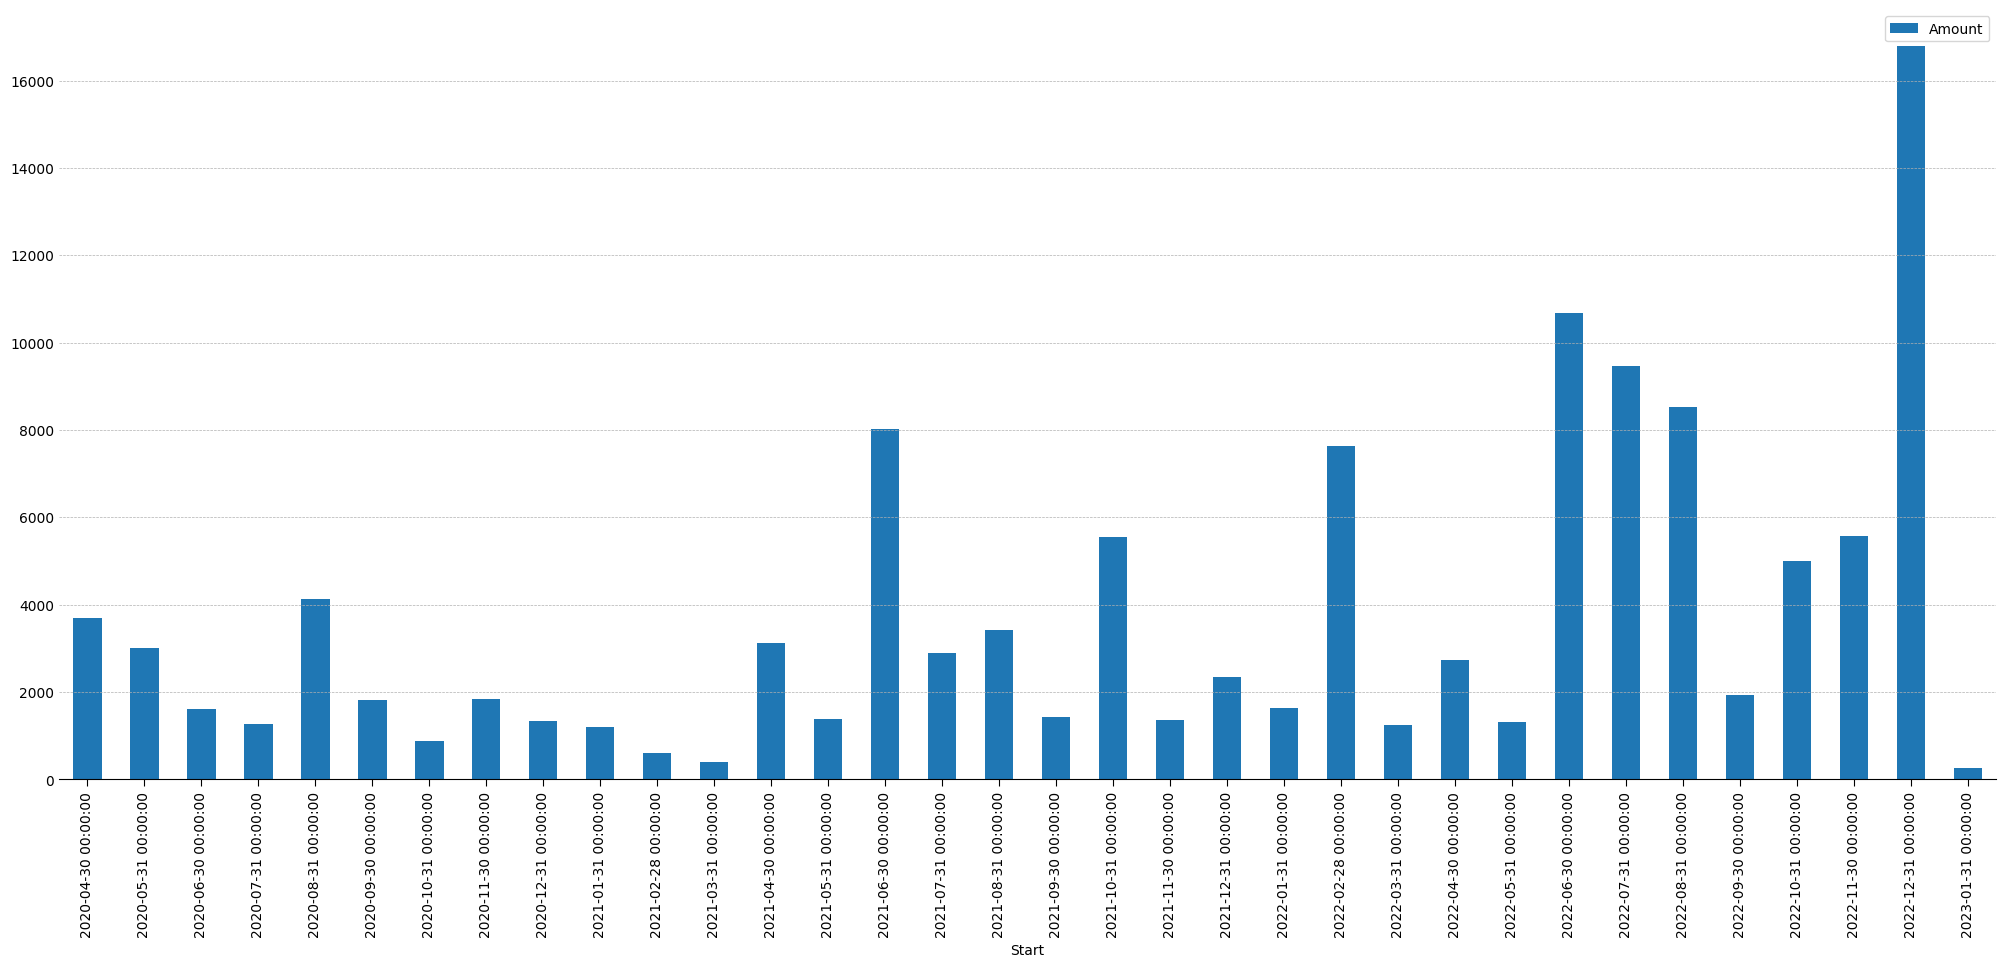

In [71]:
df_plot = df.copy()
df_plot = df_plot[["Start", "Amount"]].set_index("Start").groupby([pd.Grouper(freq = "M")]).sum()
plot_dates(df_plot)
del df_plot

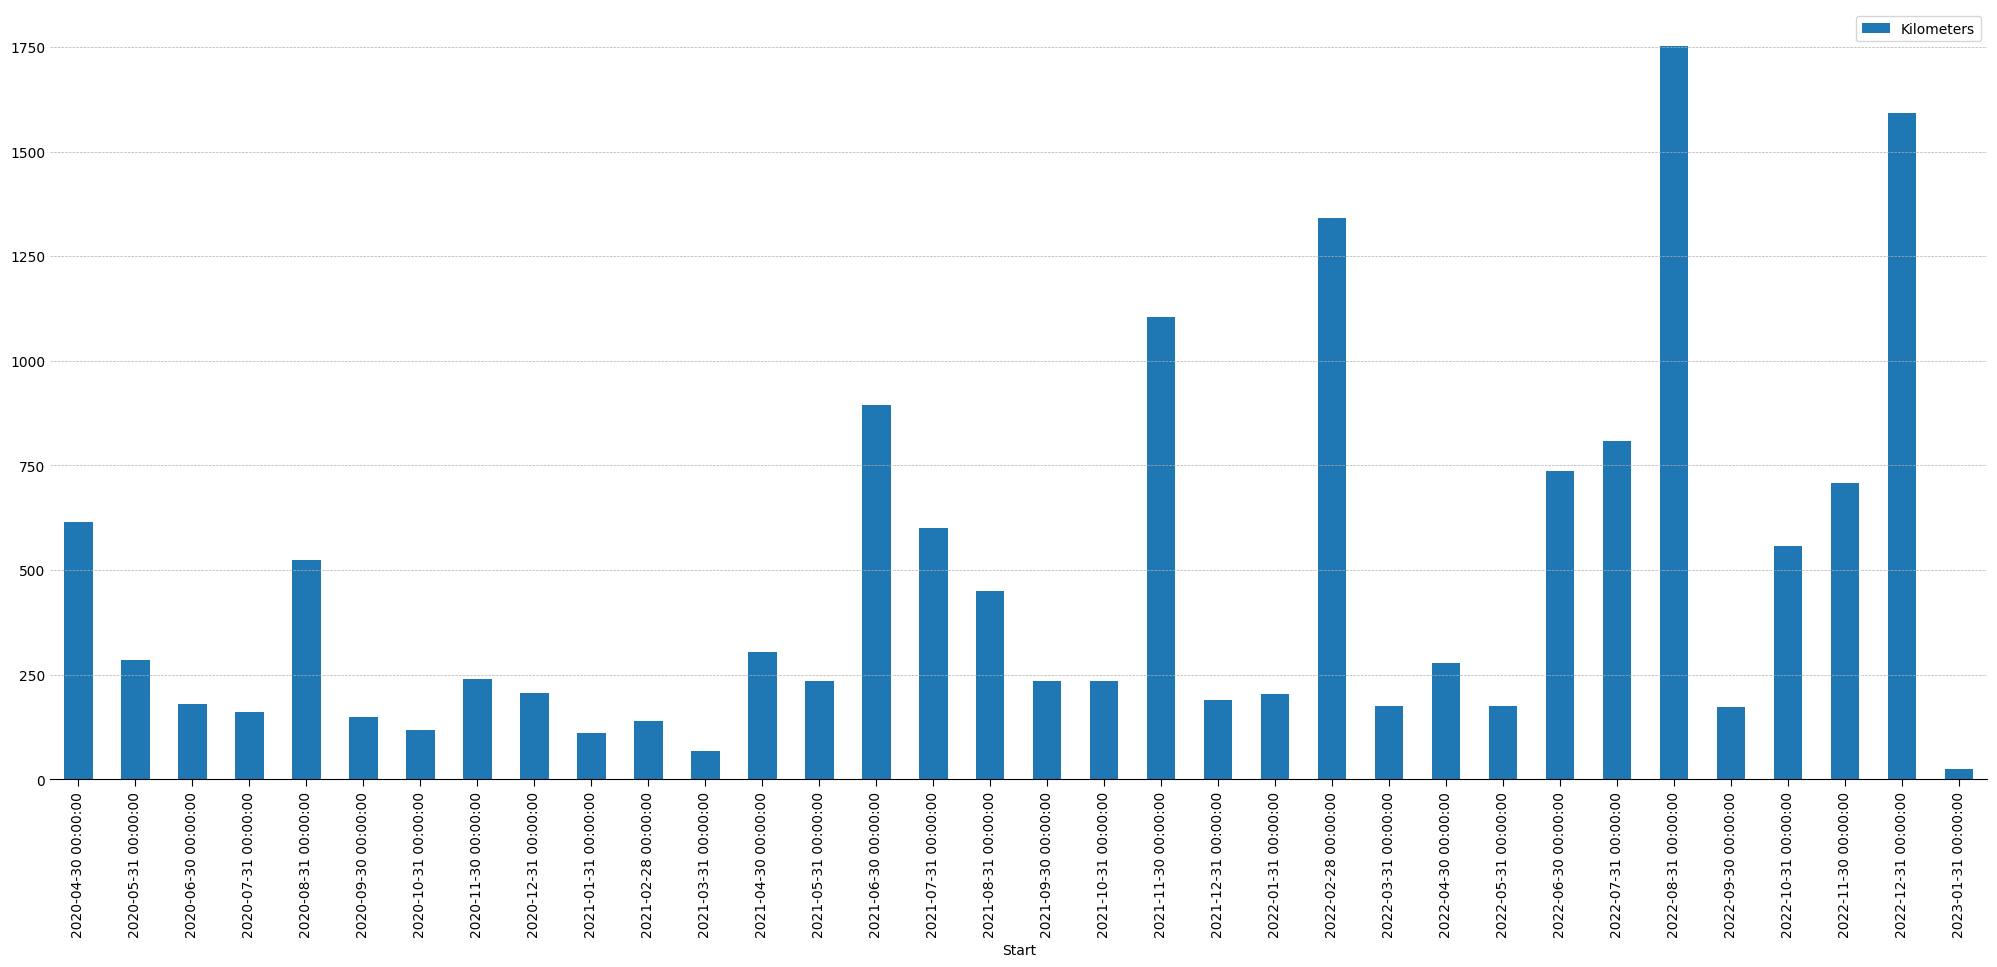

In [72]:
df_plot = df.copy()
df_plot = df_plot[["Start", "Kilometers"]].set_index("Start").groupby([pd.Grouper(freq = "M")]).sum()
plot_dates(df_plot)
del df_plot

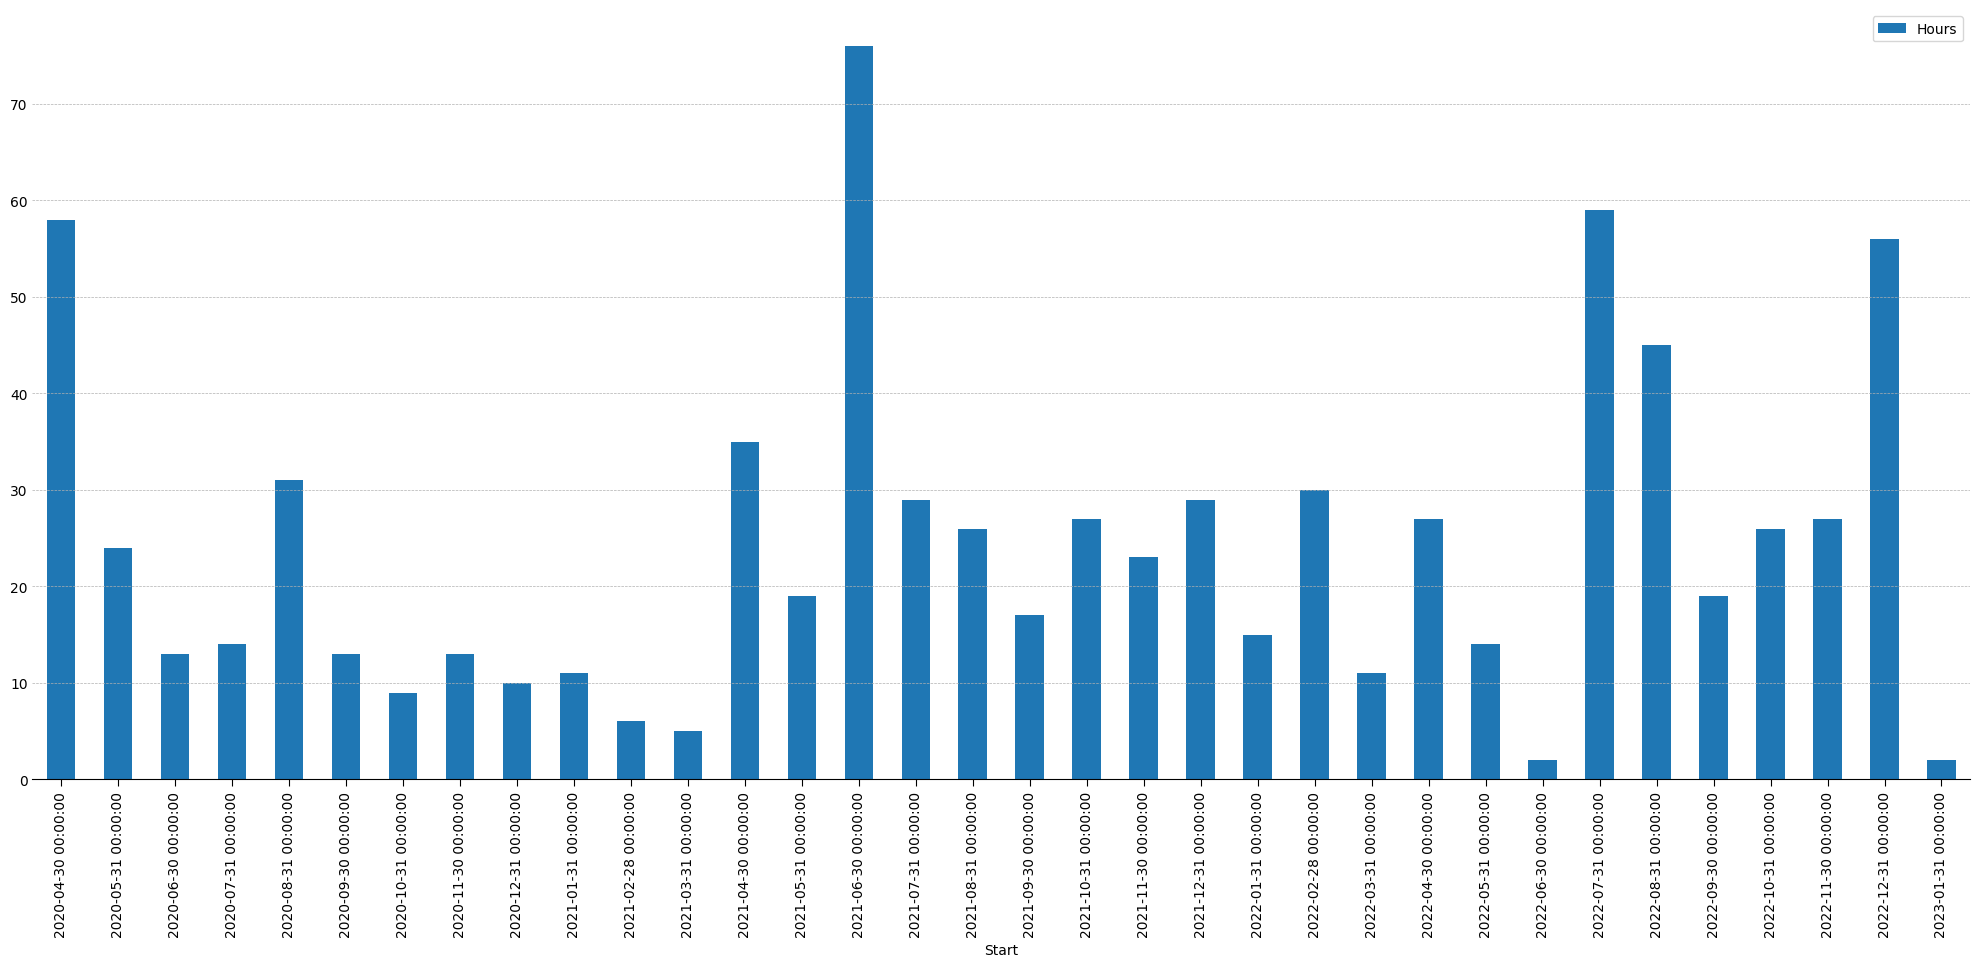

In [73]:
df_plot = df.copy()
df_plot = df_plot[["Start", "Hours"]].set_index("Start").groupby([pd.Grouper(freq = "M")]).sum()
plot_dates(df_plot)
del df_plot

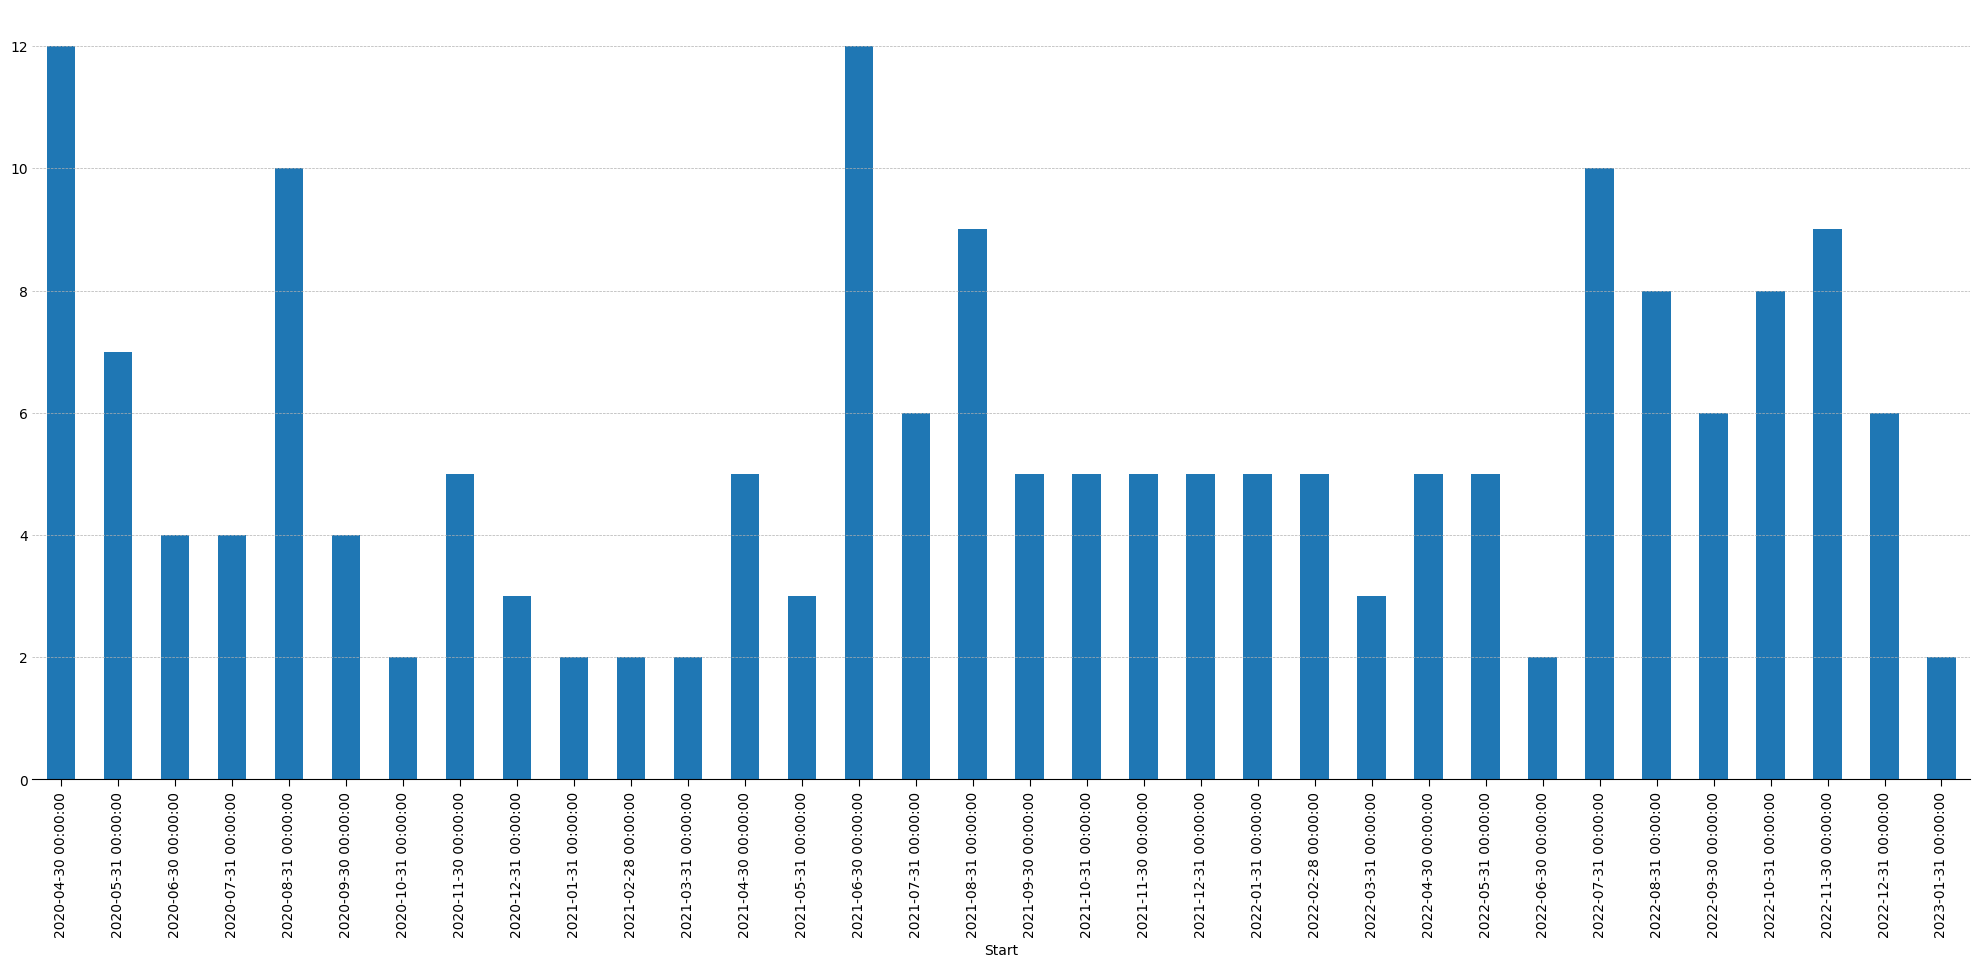

In [74]:
df_plot = df.copy()
df_plot = df_plot[["Start"]].reset_index().set_index("Start").groupby([pd.Grouper(freq = "M")])["index"].count()
plot_dates(df_plot)
del df_plot

# Adding New Variables

In [77]:
df["startYear"] = df.Start.dt.year
df["startMonth"] = df.Start.dt.month
df["endMYear"] = df.End.dt.year
df["endMonth"] = df.End.dt.month
df["HoursTotal"] = df.Days * 24 + df.Hours
df["TotalAmount"] = df.Amount - df["Amount Refunded"]

In [78]:
df.head()

,Start,End,Registration,Amount,Amount Refunded,Days,Hours,Kilometers,startYear,startMonth,endMYear,endMonth,HoursTotal,TotalAmount
0,2022-09-30,2022-09-30 12:00:00,ESP27B,320.26,0.0,0,3,22,2022,9,2022,9,3,320.26
1,2022-04-06,2022-04-06 16:00:00,ESP27B,617.50,0.0,0,7,40,2022,4,2022,4,7,617.50
2,2022-03-27,2022-03-27 17:15:00,FCE68C,559.51,0.0,0,4,106,2022,3,2022,3,4,559.51
3,2022-03-20,2022-03-20 22:00:00,MGD320,305.00,0.0,0,4,20,2022,3,2022,3,4,305.00
4,2022-03-20,2022-03-20 12:30:00,YTH92B,379.91,0.0,0,3,49,2022,3,2022,3,3,379.91
